In [1]:
#hide
from sample_project import *

# Sample project : Churn Detection

> This project is created imaginarily to show my sample code for job application. The goal of the sample project is detection of customers who are going to become churner. The definition of churning is determined according to activeness of accounts belong to customers

## Install

In order to use this project, first clone this repository (https://github.com/busracikla/sample_project) and pip install it with the command below:

`pip install -e .`

## Importing modules

In [2]:
from sample_project import config
from sample_project.helper import write_to_csv, read_from_csv
from sample_project.preprocess import prepare_transaction_data, label_data, extract_features
from sample_project.model import train_test_split, classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

## Preprocessing

### Preparing transaction dataset for customers in the scope 

In [9]:
if not os.path.exists(config.CSV_CUSTOMIZED_TRNX):
    
    tranx= prepare_transaction_data.Transactional_Data()
    trnx_scope = tranx.create_data(apply_filters=True,to_csv=False)
    
else:
    trnx_scope = read_from_csv(config.CSV_CUSTOMIZED_TRNX)
    

In [10]:
trnx_scope

,trans_id,account_id,date,type,operation,amount,balance,client_id,district_id,Total_Loan_Amount
81,1548749,5270,930113,"""PRIJEM""","""VKLAD""",800.0,800.0,6367,44,79608.0
91,1548750,5270,930114,"""PRIJEM""","""PREVOD Z UCTU""",44749.0,45549.0,6367,44,79608.0
94,3393738,11265,930114,"""PRIJEM""","""VKLAD""",1000.0,1000.0,13845,15,52788.0
100,3122924,10364,930117,"""PRIJEM""","""VKLAD""",1100.0,1100.0,12754,55,21924.0
101,3122924,10364,930117,"""PRIJEM""","""VKLAD""",1100.0,1100.0,12755,55,21924.0
...,...,...,...,...,...,...,...,...,...,...
539017,2548927,8411,961231,"""VYDAJ""","""VYBER""",14.6,20259.5,10389,20,220620.0
539018,2592488,8564,961231,"""VYDAJ""","""VYBER""",14.6,44131.0,10563,68,76680.0
539019,2592488,8564,961231,"""VYDAJ""","""VYBER""",14.6,44131.0,10564,68,76680.0
539036,516795,1766,961231,"""VYDAJ""","""VYBER""",14.6,27107.3,2141,28,30060.0


### Preparing Label

In [11]:
labelled_trnx_data = label_data.create_labelled_data(reference_date = 981231, apply_all_steps = True, to_csv = False)
labelled_trnx_data

,trans_id,account_id,date,type,operation,amount,balance,client_id,district_id,Total_Loan_Amount,churn_or_not
0,1548749,5270,930113,"""PRIJEM""","""VKLAD""",800.0,800.0,6367,44,79608.0,0
1,1548750,5270,930114,"""PRIJEM""","""PREVOD Z UCTU""",44749.0,45549.0,6367,44,79608.0,0
2,3393738,11265,930114,"""PRIJEM""","""VKLAD""",1000.0,1000.0,13845,15,52788.0,0
3,3122924,10364,930117,"""PRIJEM""","""VKLAD""",1100.0,1100.0,12754,55,21924.0,0
4,3122924,10364,930117,"""PRIJEM""","""VKLAD""",1100.0,1100.0,12755,55,21924.0,0
...,...,...,...,...,...,...,...,...,...,...,...
94778,2548927,8411,961231,"""VYDAJ""","""VYBER""",14.6,20259.5,10389,20,220620.0,0
94779,2592488,8564,961231,"""VYDAJ""","""VYBER""",14.6,44131.0,10563,68,76680.0,0
94780,2592488,8564,961231,"""VYDAJ""","""VYBER""",14.6,44131.0,10564,68,76680.0,0
94781,516795,1766,961231,"""VYDAJ""","""VYBER""",14.6,27107.3,2141,28,30060.0,0


### Extracting features

In [12]:
#hide
extract_features.extract_features(labelled_trnx_data)

,client_id,sum_bin_0,count_bin_0,sum_bin_1,count_bin_1,sum_bin_2,count_bin_2,sum_bin_3,count_bin_3,sum_bin_4,...,count_bin_5,sum_bin_6,count_bin_6,sum_bin_7,count_bin_7,sum_bin_8,count_bin_8,sum_bin_9,count_bin_9,churn_or_not
0,2,429529.9,0.0,0.0,524233.8,0.0,0.0,524215.4,0.0,0.0,...,0.0,0.0,85.0,0.0,0.0,85.0,0.0,0.0,85.0,0
1,3,429529.9,0.0,0.0,524233.8,0.0,0.0,524215.4,0.0,0.0,...,0.0,0.0,85.0,0.0,0.0,85.0,0.0,0.0,85.0,0
2,25,0.0,0.0,0.0,0.0,0.0,0.0,320047.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,90.0,0
3,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0
4,78,0.0,0.0,0.0,149168.8,0.0,0.0,1094839.6,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,85.0,0.0,0.0,97.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,13924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0
680,13955,0.0,0.0,0.0,0.0,0.0,0.0,639264.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,88.0,0
681,13956,0.0,0.0,0.0,0.0,0.0,0.0,639264.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,88.0,0
682,13968,0.0,0.0,0.0,137091.9,0.0,0.0,726317.1,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,81.0,0.0,0.0,95.0,0


## Modelling

### Train test split

In [13]:
splitter = train_test_split.Stratified_Split()
train,test = splitter()

In [14]:
print(train.shape,test.shape)

(615, 22) (69, 22)


In [15]:
display(train_test_split.check_class_balance(train))
train_test_split.check_class_balance(test)

,count,percentage
churn_or_not,,
0,566,0.920325
1,49,0.079675


,count,percentage
churn_or_not,,
0,64,0.927536
1,5,0.072464


###  Classifier and Performance

#### Logistic Regression

In [16]:
log_reg  = classifier.Classifier()
train_result_lr, test_result_lr =  log_reg()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


              precision    recall  f1-score   support

           0       0.93      0.58      0.72       566
           1       0.10      0.53      0.17        49

    accuracy                           0.58       615
   macro avg       0.52      0.56      0.44       615
weighted avg       0.87      0.58      0.67       615



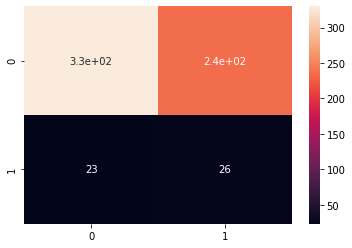

AUC: 0.56


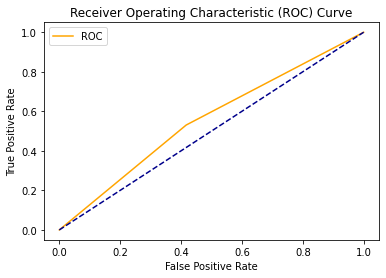

In [17]:
classifier.show_performance(train_result_lr, conf_matrix = True, Report = True, Auc_roc = True)

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        64
           1       0.14      1.00      0.25         5

    accuracy                           0.57        69
   macro avg       0.57      0.77      0.47        69
weighted avg       0.94      0.57      0.66        69



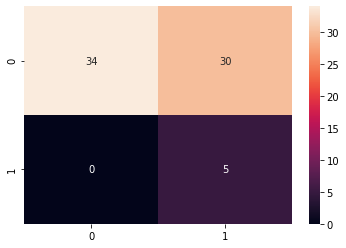

AUC: 0.77


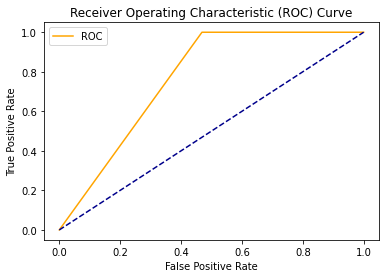

In [18]:
classifier.show_performance(test_result_lr, conf_matrix = True, Report = True, Auc_roc = True)

#### Random Forest

In [19]:
#hide
model = RandomForestClassifier(class_weight="balanced")
parameter_ranges = {"n_estimators":np.arange(10,100,20), "max_depth":np.arange(2,10,3),"ccp_alpha":np.arange(0,1,0.20)}
random_forest  = classifier.Classifier(model=model, parameter_ranges = parameter_ranges, scaling=False)
train_result_rf, test_result_rf = random_forest()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        64
           1       0.40      0.40      0.40         5

    accuracy                           0.91        69
   macro avg       0.68      0.68      0.68        69
weighted avg       0.91      0.91      0.91        69



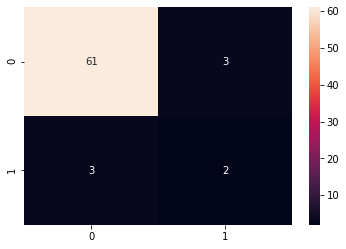

AUC: 0.68


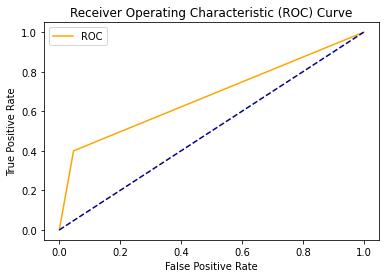

In [20]:
classifier.show_performance(test_result_rf, conf_matrix = True, Report = True, Auc_roc = True)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        64
           1       0.40      0.40      0.40         5

    accuracy                           0.91        69
   macro avg       0.68      0.68      0.68        69
weighted avg       0.91      0.91      0.91        69



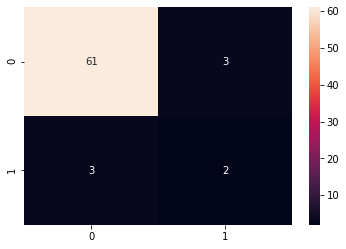

AUC: 0.68


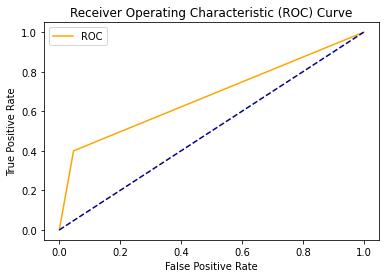

In [21]:
classifier.show_performance(test_result_rf, conf_matrix = True, Report = True, Auc_roc = True)